In [12]:
import numpy as np
import pandas as pd
df = pd.DataFrame(
    {
        'A': [1, np.nan, 3, 4, 5],
        'B': [6, 7, 8, np.nan, 10],
        'C': [11, 12, 13, 14, 15]
    }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [3]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [14]:
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(np.nan, strategy='mean')
imp.fit(df)
imp.transform(df)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass missing_values=nan as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [15]:
import pandas as pd
df = pd.DataFrame(
    {
        'A': [1, 2, 3, 4, 5],
        'B': ['a', 'b', 'a', 'b', 'c']
    }
)
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['B'])
le.transform(df['B'])

array([0, 1, 0, 1, 2])

In [17]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_ohe = df.copy()
le = LabelEncoder()
df_ohe['B'] = le.fit_transform(df_ohe['B'])
ohe = OneHotEncoder()
ohe.fit_transform(df_ohe).toarray()
# ohe.fit_transform(df_ohe[['B']]).toarray()

array([[1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1.]])

In [46]:
import pandas as pd
df = pd.DataFrame(
    {
        'A': [1, 2, 3, 4, 5],
        'B': [100, 200, 400, 500, 800]
    }
)
df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [47]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [48]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print('X:')
print(X[:5, :])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


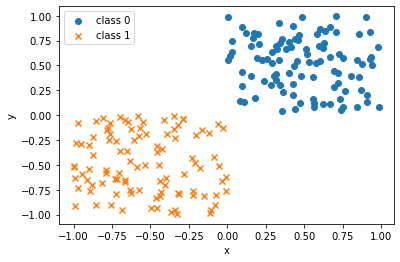

In [55]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
X0 = np.random.uniform(size=(100, 2))
y0 = np.repeat(0, 100)
X1 = np.random.uniform(-1.0, 0.0, size=(100, 2))
y1 = np.repeat(1, 100)
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [73]:
from sklearn.svm import SVC
def plot_boudary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors='none', edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

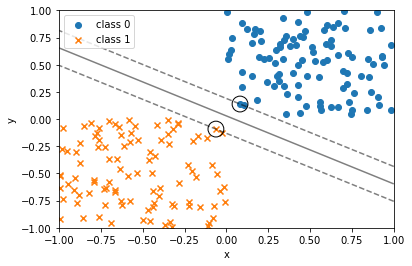

In [74]:
plot_boudary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

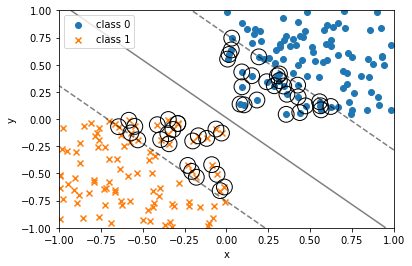

In [77]:
plot_boudary_margin_sv(X0, y0, X1, y1, kernel='linear', C=0.1)

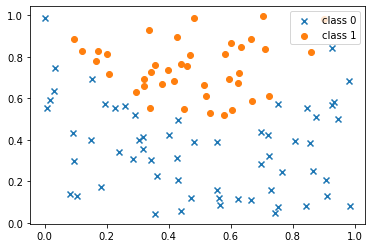

In [87]:
np.random.seed(123)
X = np.random.random(size=(100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 + 0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label='class 0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='class 1')
ax.legend()
plt.show()

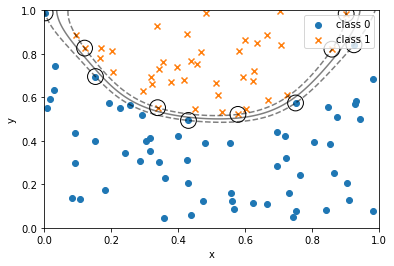

In [91]:
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boudary_margin_sv(X0, y0, X1, y1, kernel='rbf', C=1e3, xmin=0, ymin=0)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [2]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['Sentosa', 'Versicolor', 'Virginica'],
                           feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
                           out_file=None
)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [3]:
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [4]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=123)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(X_test)

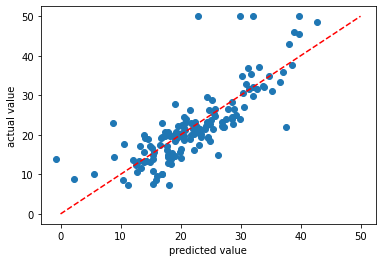

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 50), (0, 50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

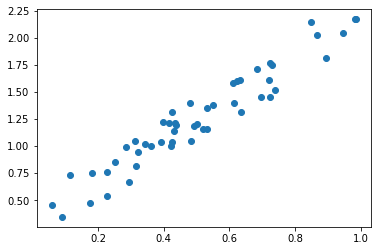

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
X = np.random.random(size=50)
Y = 2*X + 0.5*np.random.rand(50)
fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.show()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))

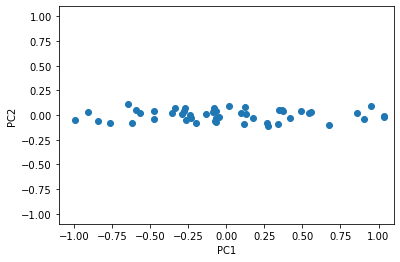

In [11]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

In [13]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc = SVC()
cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

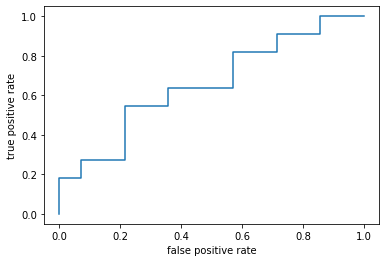

In [16]:
import numpy as np
import matplotlib.pyplot as plt
fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8, 9, 10, 10, 11, 12, 12, 13, 14]) / 14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11]) / 11
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [17]:
from sklearn.metrics import roc_curve
labels = np.array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])
probs = np.array([0.98, 0.95, 0.9, 0.87, 0.85,
                  0.8, 0.75, 0.71, 0.63, 0.55,
                  0.51, 0.47, 0.43, 0.38, 0.35,
                 0.31, 0.28, 0.24, 0.22, 0.19,
                 0.15, 0.12, 0.08, 0.04, 0.01])
fpr, tpr, threshold = roc_curve(labels, probs)
print('偽陽性率:', fpr)
print('真陽性率:', tpr)

偽陽性率: [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率: [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(labels, probs)

0.6558441558441558

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5]}
cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5]})

In [20]:
cv.best_params_

{'max_depth': 3}

In [21]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [22]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
X = data[:100, [0, 2]]

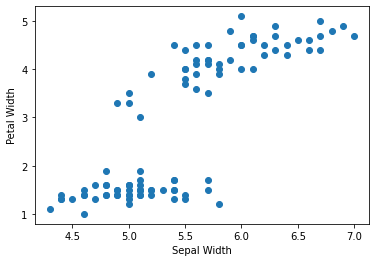

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)
y_km = km.fit_predict(X)

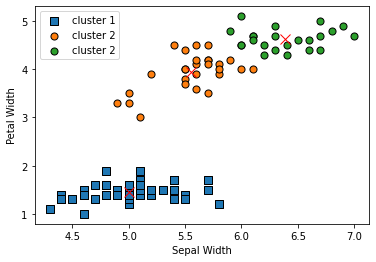

In [26]:
import numpy as np
fig, ax = plt.subplots()
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, edgecolors='black', marker='s', label='cluster 1')
ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]), marker='x', markersize=10, color='red')
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, edgecolors='black', marker='o', label='cluster 2')
ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]), marker='x', markersize=10, color='red')
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, edgecolors='black', marker='o', label='cluster 2')
ax.plot(np.mean(X[y_km == 2, 0]), np.mean(X[y_km == 2, 1]), marker='x', markersize=10, color='red')
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

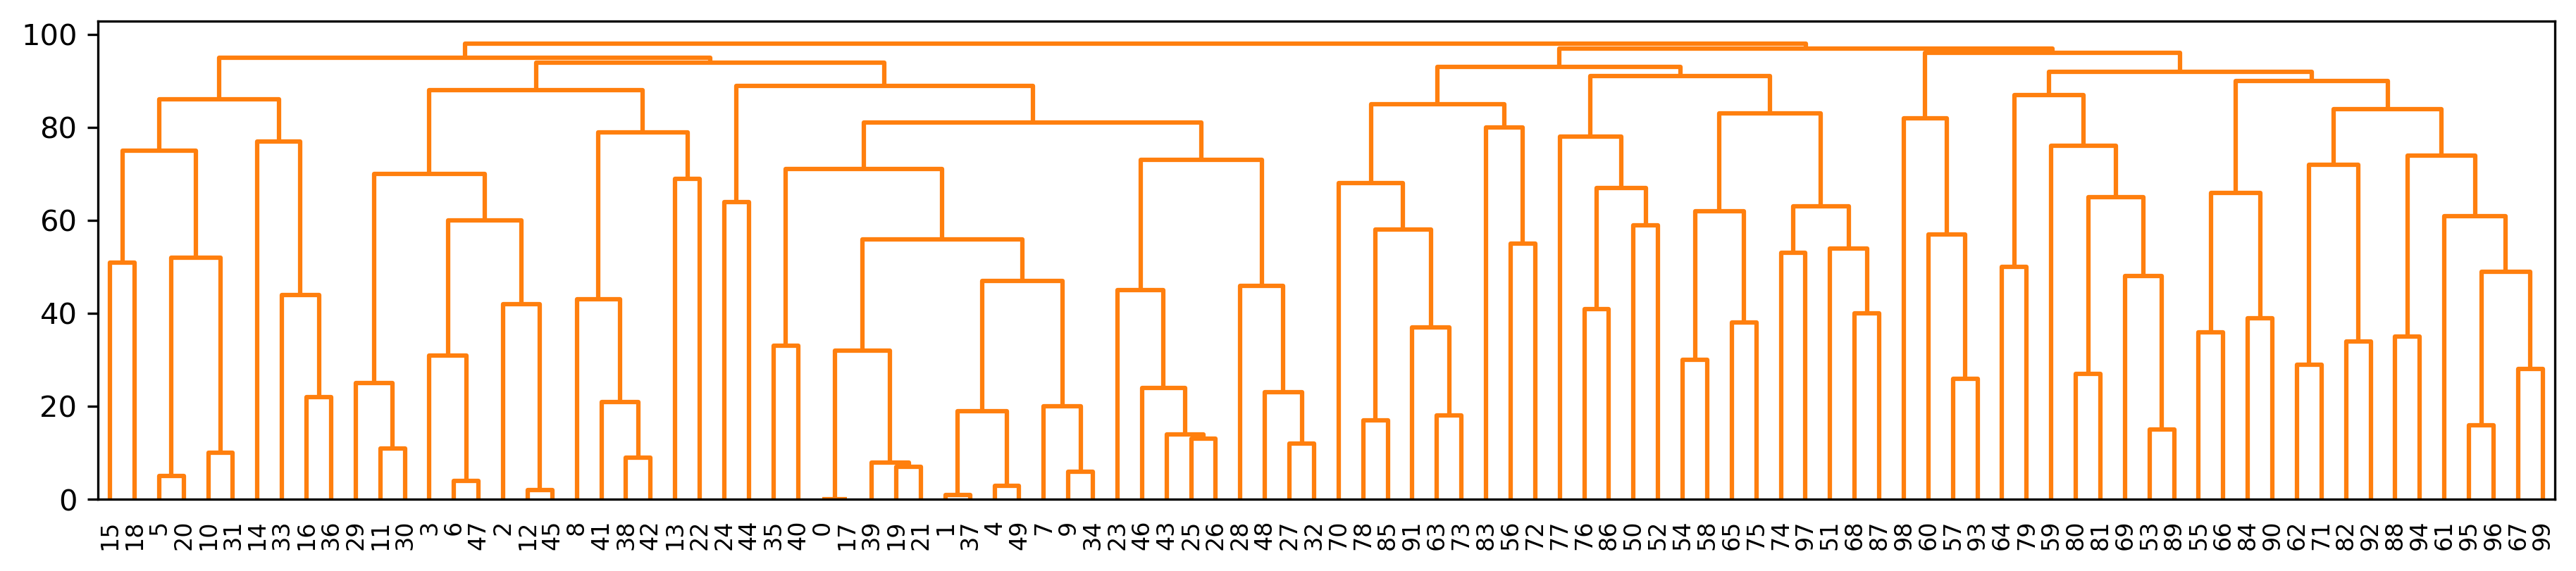

In [30]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
children = ac.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.hstack((children, distance[:, np.newaxis], no_of_observations[:, np.newaxis])).astype(float)
fig, ax = plt.subplots(figsize=(15, 3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8, color_threshold=np.inf)
plt.show()